In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the Dataset
df = pd.read_csv('netflix_titles.csv')

print(df.head())

  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

In [3]:
# 2. Checking the general information of the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None


In [4]:
# Step 2: Data Cleaning and Preprocessing
# Check for missing values
print("Missing values in each column:\n", df.isnull().sum())

# Drop rows with missing 'rating' as it is crucial for analysis
df.dropna(subset=['rating'], inplace=True)

# Convert 'release_year' to integer for easier analysis
df['release_year'] = df['release_year'].astype(int)

Missing values in each column:
 show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [8]:
# Step 3: Basic Exploratory Data Analysis (EDA)
# Data summary
print("\nDataset Overview:\n", df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 8803 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8803 non-null   object
 1   type          8803 non-null   object
 2   title         8803 non-null   object
 3   director      6172 non-null   object
 4   cast          7978 non-null   object
 5   country       7973 non-null   object
 6   date_added    8793 non-null   object
 7   release_year  8803 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8800 non-null   object
 10  listed_in     8803 non-null   object
 11  description   8803 non-null   object
dtypes: int64(1), object(11)
memory usage: 894.1+ KB

Dataset Overview:
 None



Descriptive statistics:
        release_year
count   8803.000000
mean    2014.179825
std        8.821247
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000


C:\Users\f-moharami\AppData\Local\Temp\ipykernel_1656\2059674402.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=df, palette='Set2')


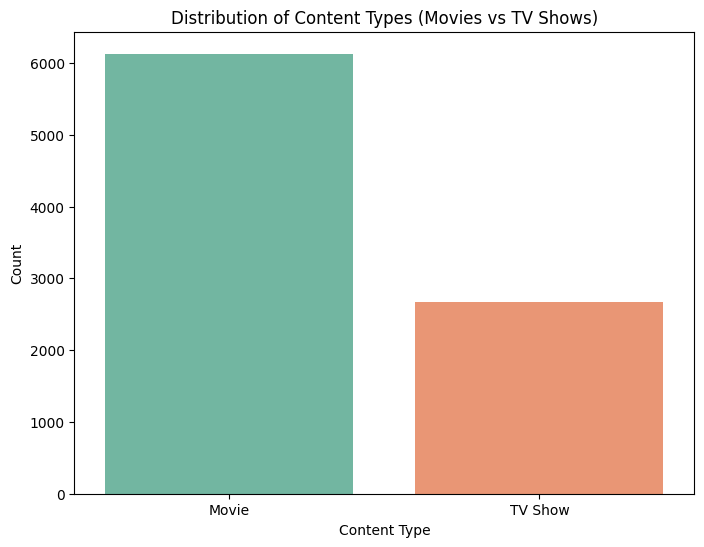

In [7]:
print("\nDescriptive statistics:\n", df.describe())

# Step 4: Data Visualization
# Distribution of content types (Movies/TV Shows)
plt.figure(figsize=(8, 6))
sns.countplot(x='type', data=df, palette='Set2')
plt.title('Distribution of Content Types (Movies vs TV Shows)')
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.show()

C:\Users\f-moharami\AppData\Local\Temp\ipykernel_1656\1322357344.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=df, palette='Set3', order=df['rating'].value_counts().index)


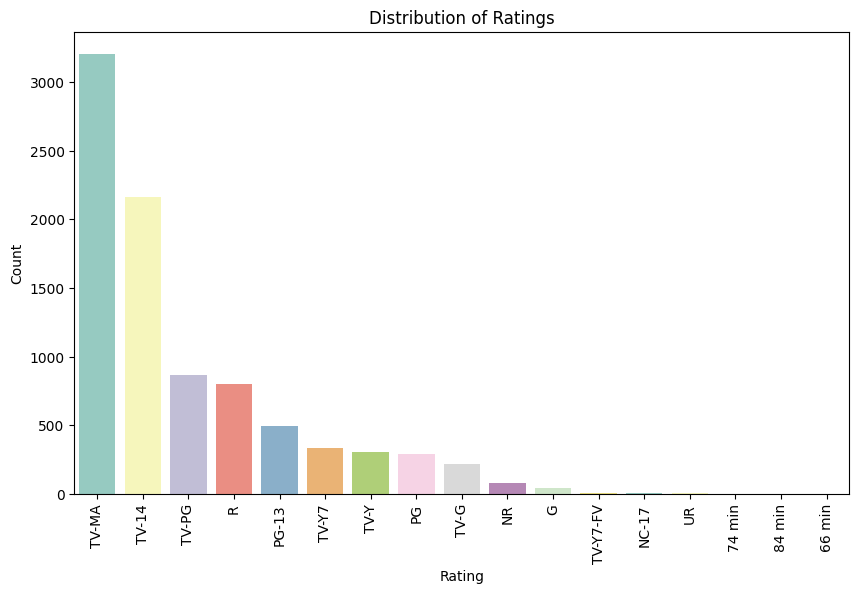

In [9]:
# Distribution of ratings (only for non-null ratings)
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=df, palette='Set3', order=df['rating'].value_counts().index)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

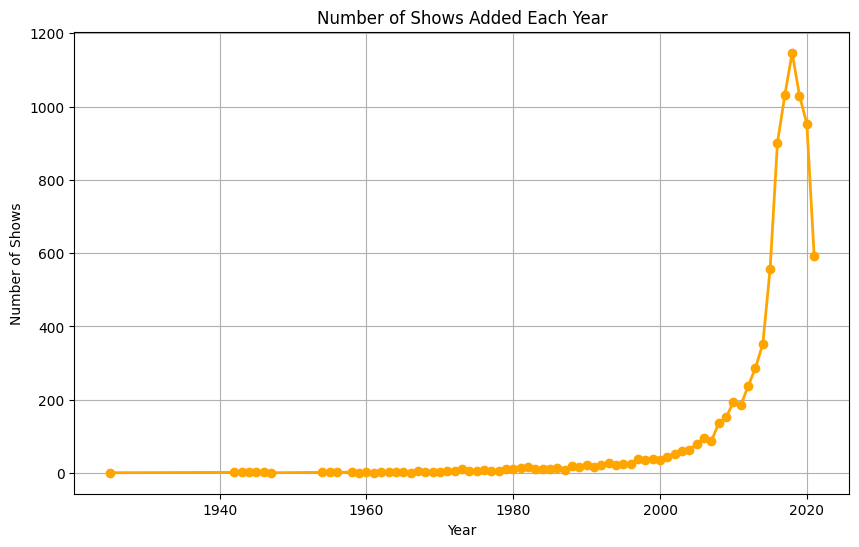

In [10]:
# Number of shows added each year
plt.figure(figsize=(10, 6))
df.groupby('release_year').size().plot(kind='line', color='orange', marker='o', linewidth=2)
plt.title('Number of Shows Added Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Shows')
plt.grid(True)
plt.show()

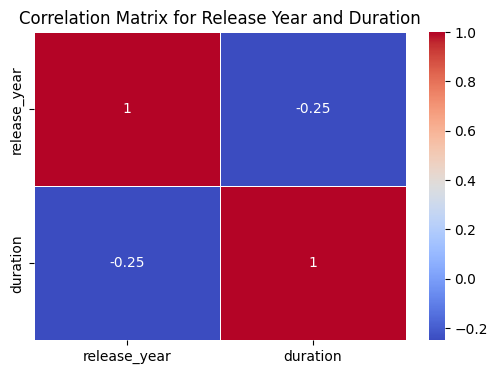

In [15]:
# Step 5: Correlation Analysis
# First, clean the 'duration' column to convert it into numeric values (minutes)
# Remove ' min', ' Seasons', and any other non-numeric characters, and extract the numbers

def clean_duration(duration):
    # Check if it's a string and try to extract the number
    if isinstance(duration, str):
        # Extract numbers and convert to float
        numbers = ''.join([char for char in duration if char.isdigit()])
        if numbers:
            return float(numbers)
    return None  # Return None for rows that can't be converted

# Apply the cleaning function to the 'duration' column
df['duration'] = df['duration'].apply(clean_duration)

# Now, we can calculate the correlation matrix
numerical_features = df[['release_year', 'duration']].dropna()
correlation_matrix = numerical_features.corr()

# Plot the correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix for Release Year and Duration')
plt.show()


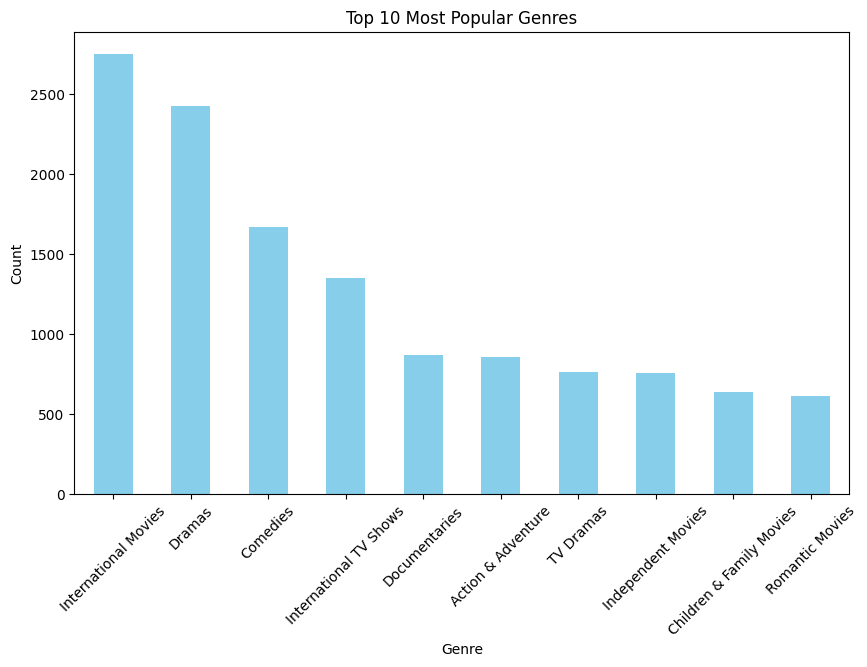

In [17]:
# Step 6: Top Content Analysis
# Most popular genres (based on 'listed_in' column)
genre_series = df['listed_in'].str.split(', ', expand=True).stack()
genre_counts = genre_series.value_counts().head(10)

# Plot top 10 genres
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Popular Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [18]:
# Step 7: Top 10 Highest Rated Movies/TV Shows
top_rated = df.sort_values(by='rating', ascending=False).head(10)
print("\nTop 10 Highest Rated Shows/Movies:\n", top_rated[['title', 'rating', 'type']])


Top 10 Highest Rated Shows/Movies:
                                                   title    rating     type
8790                      You Don't Mess with the Zohan        UR    Movie
7058                                      Immoral Tales        UR    Movie
7988                                           Sex Doll        UR    Movie
7513                          Motu Patlu: King of Kings  TV-Y7-FV    Movie
6581                                       Dear Dracula  TV-Y7-FV    Movie
7290  LEGO Ninjago: Masters of Spinjitzu: Day of the...  TV-Y7-FV    Movie
7292                                       Leo the Lion  TV-Y7-FV    Movie
7317                Little Singham aur Kaal ka Mahajaal  TV-Y7-FV    Movie
7646                      Oh No! It's an Alien Invasion  TV-Y7-FV  TV Show
1702               Fukrey Boyzzz: Space Mein Fukrapanti     TV-Y7    Movie
